In [22]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")




In [23]:
# Load the train dataset
df_train = pd.read_csv('train_set.csv')
# value count for each language
data["lang_id"].value_counts()

# Display.max_colwidth option  set to None to show all text content without truncation
pd.set_option('display.max_colwidth', None)
#load the test dataset
df_test = pd.read_csv('test_set.csv')

In [24]:
#view first 3 row of train dataset
df_train.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months


In [25]:
#view tail of test dataset
df_test.tail(3)

,index,text
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ha o na ho kgona ho fetola kgetho ena hara selemo ntle le tumello ya Boto ya Batshwaredi."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella tlhahlobo ya ho sheba lefu lena. Leha ho le jwalo, o tlameha ho fumana kalafo ya hao ya TB ditsing tsa Mmuso."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [26]:
# separating the independent and dependant features
X = data["text"]
y = data["lang_id"]


In [29]:
#create empty list to store modified texts
modified_data = []

for word in X:
    # removing the special characters and numbers
    word = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', word)
    word = re.sub(r'[[]]', ' ', word)
    # convert the text to lower case
    word = word.lower()
    # appending to empty modified data list
    modified_data.append(word)

In [30]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [31]:
x_train

23204                                                              vhugudisi ha duvha linwe na linwe hune ha dzhia minithi ya hu do katela nyambedzano ya u divhadza nga tshumelo hune ha fhiwa nga mulanguli wa davhi hune ha itiwa phanda ha musi davhi la bannga li tshi vula
2111                                             diriša tshedimošo go tšwa sengwalweng sa go ngwalwa go hlama krafo goba tšhate goba go fa maina a dikarolwana tša yona mo seswantšhong le go diriša tshedimošo go tšwa tšhateng krafong goba seswantšhong go ngwala sengwalwana
15150    lefu lena le tshellanwa ka tshwaetso ya lerothodi ke hore ha motho ya tshwaeditsweng a hohlola kapa a ithimola mme wena o be o hula moya oo ba o thimotseng kapa ba o hohlotseng le ha ba ka hohlolla sebakeng fela mme o be o hula moya o sebakeng seo o ka tshwaetswa
22017        ditatemente tsa dithuto tsa puo ya lapeng tsa ya tlatsetso ya pele le tsa ya tlatsetso ya bobedi di ka fetolelwa dipuong tse ding tsa matjhaba tse dumeletsweng mme dipu

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have the training data x_train and corresponding labels y_train
# Create the pipeline
lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Train the pipeline
lr.fit(x_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [33]:
pred_lr = lr.predict(x_test)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Classification Report')
print(classification_report(y_test, pred_lr))

print("The accuracy score of the SVC is:", accuracy_score(y_test, pred_lr))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       612
         eng       1.00      1.00      1.00       624
         nbl       0.99      0.98      0.99       597
         nso       1.00      1.00      1.00       604
         sot       1.00      1.00      1.00       603
         ssw       0.99      1.00      0.99       563
         tsn       1.00      1.00      1.00       620
         tso       1.00      1.00      1.00       604
         ven       1.00      1.00      1.00       608
         xho       0.99      1.00      0.99       583
         zul       0.99      0.98      0.98       582

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

The accuracy score of the SVC is: 0.9956060606060606


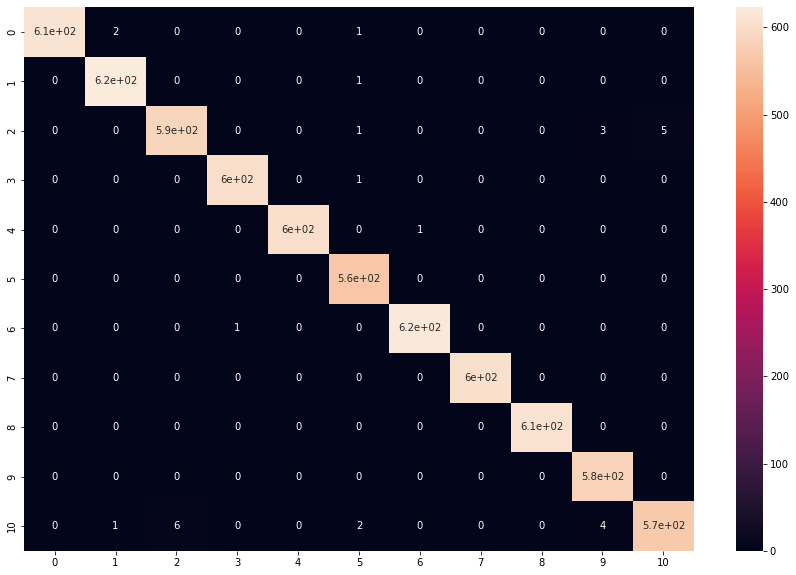

In [35]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, pred_lr)
cm = confusion_matrix(y_test, pred_lr)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# prediction = stacking_NB2.predict(X_test)
prediction = lr.predict(x_test)


In [37]:
X = test['text']
# Vectorize = vect.transform(X)

# vectorized_data = vectorizer.fit_transform(X)

In [38]:
print(type(prediction))

<class 'numpy.ndarray'>


In [39]:
test['lang_id'] = lr.predict(X)

In [41]:
submission = test[['index', 'lang_id']]
submission.to_csv('my_submission2.csv',index=False)
submission

,index,lang_id
0,1,ssw
1,2,nbl
2,3,ven
3,4,ssw
4,5,ssw
...,...,...
5677,5678,ssw
5678,5679,nso
5679,5680,sot
5680,5681,sot
